### import lib

In [1]:
import warnings
import datetime
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Read data frame

In [2]:
df = pd.read_csv('Annual_traffic.csv')

### initial analysis and data pre-proc

In [3]:
df.head()

,Sector / eSector,Nodeb/eNodeb Engineering Num,Unnamed: 2,Year - Calendar,Week - Calendar,National_PDCP_VOL_TOT_MB,HSPA_TOT_MB
0,1,[NOT_AVAILABLE],Rogers Arena (Ib),2016,1,"342,013","194,515"
1,1,[NOT_AVAILABLE],Rogers Arena (Ib),2016,2,"1,070,674","754,640"
2,1,[NOT_AVAILABLE],Rogers Arena (Ib),2016,3,"1,138,146","805,992"
3,1,[NOT_AVAILABLE],Rogers Arena (Ib),2016,4,"1,127,209","808,013"
4,1,[NOT_AVAILABLE],Rogers Arena (Ib),2016,5,"1,059,499","807,457"


In [4]:
df.tail()

,Sector / eSector,Nodeb/eNodeb Engineering Num,Unnamed: 2,Year - Calendar,Week - Calendar,National_PDCP_VOL_TOT_MB,HSPA_TOT_MB
4558328,3,YONGSK03,Young,2018,49,0,"15,993"
4558329,3,YONGSK03,Young,2018,50,0,"19,474"
4558330,3,YONGSK03,Young,2018,51,0,"18,473"
4558331,3,YONGSK03,Young,2018,52,0,"13,494"
4558332,3,YONGSK03,Young,2018,53,0,"4,144"


In [5]:
df.shape

(4558333, 7)

In [6]:
df.columns

Index(['Sector / eSector', 'Nodeb/eNodeb Engineering Num', 'Unnamed: 2',
       'Year - Calendar', 'Week - Calendar', 'National_PDCP_VOL_TOT_MB',
       'HSPA_TOT_MB'],
      dtype='object')

In [7]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('/', '_') for c in df.columns]
df.columns = [c.replace('__', '_') for c in df.columns]
df.columns = [c.replace('_-_', '_') for c in df.columns]

In [8]:
df.columns

Index(['Sector__eSector', 'Nodeb_eNodeb_Engineering_Num', 'Unnamed:_2',
       'Year_Calendar', 'Week_Calendar', 'National_PDCP_VOL_TOT_MB',
       'HSPA_TOT_MB'],
      dtype='object')

### filter data frame on the serving site W3969

In [9]:
df[df['Nodeb_eNodeb_Engineering_Num'] == 'W3969']

,Sector__eSector,Nodeb_eNodeb_Engineering_Num,Unnamed:_2,Year_Calendar,Week_Calendar,National_PDCP_VOL_TOT_MB,HSPA_TOT_MB
1791041,1,W3969,Wadsworth,2016,1,0,"8,154"
1791042,1,W3969,Wadsworth,2016,2,0,"53,147"
1791043,1,W3969,Wadsworth,2016,3,0,"62,314"
1791044,1,W3969,Wadsworth,2016,4,0,"59,403"
1791045,1,W3969,Wadsworth,2016,5,0,"75,371"
1791046,1,W3969,Wadsworth,2016,6,0,"68,504"
1791047,1,W3969,Wadsworth,2016,7,0,"63,960"
1791048,1,W3969,Wadsworth,2016,8,0,"43,263"
1791049,1,W3969,Wadsworth,2016,9,0,"54,291"
1791050,1,W3969,Wadsworth,2016,10,0,"54,005"


In [10]:
df2 = df[df['Nodeb_eNodeb_Engineering_Num'] == 'W3969']

In [11]:
df2.head()

,Sector__eSector,Nodeb_eNodeb_Engineering_Num,Unnamed:_2,Year_Calendar,Week_Calendar,National_PDCP_VOL_TOT_MB,HSPA_TOT_MB
1791041,1,W3969,Wadsworth,2016,1,0,"8,154"
1791042,1,W3969,Wadsworth,2016,2,0,"53,147"
1791043,1,W3969,Wadsworth,2016,3,0,"62,314"
1791044,1,W3969,Wadsworth,2016,4,0,"59,403"
1791045,1,W3969,Wadsworth,2016,5,0,"75,371"


In [12]:
df2.shape

(477, 7)

In [13]:
df2['Year_Calendar']=df2['Year_Calendar'].map(str)
df2['Week_Calendar']=df2['Week_Calendar'].map(str)

In [14]:
df2['period'] = df2[['Year_Calendar' , 'Week_Calendar']].apply(lambda x: '-'.join(x), axis=1)

In [15]:
df2['period']

1791041     2016-1
1791042     2016-2
1791043     2016-3
1791044     2016-4
1791045     2016-5
1791046     2016-6
1791047     2016-7
1791048     2016-8
1791049     2016-9
1791050    2016-10
1791051    2016-11
1791052    2016-12
1791053    2016-13
1791054    2016-14
1791055    2016-15
1791056    2016-16
1791057    2016-17
1791058    2016-18
1791059    2016-19
1791060    2016-20
1791061    2016-21
1791062    2016-22
1791063    2016-23
1791064    2016-24
1791065    2016-25
1791066    2016-26
1791067    2016-27
1791068    2016-28
1791069    2016-29
1791070    2016-30
            ...   
4468812    2018-24
4468813    2018-25
4468814    2018-26
4468815    2018-27
4468816    2018-28
4468817    2018-29
4468818    2018-30
4468819    2018-31
4468820    2018-32
4468821    2018-33
4468822    2018-34
4468823    2018-35
4468824    2018-36
4468825    2018-37
4468826    2018-38
4468827    2018-39
4468828    2018-40
4468829    2018-41
4468830    2018-42
4468831    2018-43
4468832    2018-44
4468833    2

In [16]:
#The -1 and -%w pattern tells the parser to pick the Monday in that week
df2['date'] = df2['period'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-%W-%w"))

In [17]:
df2['date']

1791041   2016-01-04
1791042   2016-01-11
1791043   2016-01-18
1791044   2016-01-25
1791045   2016-02-01
1791046   2016-02-08
1791047   2016-02-15
1791048   2016-02-22
1791049   2016-02-29
1791050   2016-03-07
1791051   2016-03-14
1791052   2016-03-21
1791053   2016-03-28
1791054   2016-04-04
1791055   2016-04-11
1791056   2016-04-18
1791057   2016-04-25
1791058   2016-05-02
1791059   2016-05-09
1791060   2016-05-16
1791061   2016-05-23
1791062   2016-05-30
1791063   2016-06-06
1791064   2016-06-13
1791065   2016-06-20
1791066   2016-06-27
1791067   2016-07-04
1791068   2016-07-11
1791069   2016-07-18
1791070   2016-07-25
             ...    
4468812   2018-06-11
4468813   2018-06-18
4468814   2018-06-25
4468815   2018-07-02
4468816   2018-07-09
4468817   2018-07-16
4468818   2018-07-23
4468819   2018-07-30
4468820   2018-08-06
4468821   2018-08-13
4468822   2018-08-20
4468823   2018-08-27
4468824   2018-09-03
4468825   2018-09-10
4468826   2018-09-17
4468827   2018-09-24
4468828   201

In [18]:
df2.dtypes

Sector__eSector                          int64
Nodeb_eNodeb_Engineering_Num            object
Unnamed:_2                              object
Year_Calendar                           object
Week_Calendar                           object
National_PDCP_VOL_TOT_MB                object
HSPA_TOT_MB                             object
period                                  object
date                            datetime64[ns]
dtype: object

In [19]:
df2['HSPA_TOT_MB']

1791041      8,154
1791042     53,147
1791043     62,314
1791044     59,403
1791045     75,371
1791046     68,504
1791047     63,960
1791048     43,263
1791049     54,291
1791050     54,005
1791051     51,256
1791052     40,077
1791053     41,304
1791054     53,938
1791055     57,421
1791056     48,729
1791057     51,503
1791058     50,593
1791059     59,330
1791060     63,002
1791061     52,285
1791062     52,200
1791063     69,663
1791064     62,431
1791065     54,568
1791066     60,171
1791067     80,966
1791068    103,729
1791069     87,029
1791070     80,267
            ...   
4468812      4,965
4468813      5,181
4468814      4,723
4468815      4,883
4468816      5,407
4468817      6,479
4468818      4,716
4468819      5,535
4468820      5,700
4468821      5,512
4468822      5,620
4468823      5,270
4468824      4,448
4468825      6,252
4468826      5,004
4468827      4,542
4468828      4,040
4468829      4,723
4468830      3,188
4468831      4,043
4468832      2,804
4468833     

In [20]:
df2['HSPA_TOT_MB'] = df2['HSPA_TOT_MB'].str.replace(',','')
df2['HSPA_TOT_MB'] = df2.HSPA_TOT_MB.astype(float).fillna(0.0)

df2['National_PDCP_VOL_TOT_MB'] = df2['National_PDCP_VOL_TOT_MB'].str.replace(',','')
df2['National_PDCP_VOL_TOT_MB'] = df2.National_PDCP_VOL_TOT_MB.astype(float).fillna(0.0)

In [21]:
df2['HSPA_TOT_MB']

1791041      8154.0
1791042     53147.0
1791043     62314.0
1791044     59403.0
1791045     75371.0
1791046     68504.0
1791047     63960.0
1791048     43263.0
1791049     54291.0
1791050     54005.0
1791051     51256.0
1791052     40077.0
1791053     41304.0
1791054     53938.0
1791055     57421.0
1791056     48729.0
1791057     51503.0
1791058     50593.0
1791059     59330.0
1791060     63002.0
1791061     52285.0
1791062     52200.0
1791063     69663.0
1791064     62431.0
1791065     54568.0
1791066     60171.0
1791067     80966.0
1791068    103729.0
1791069     87029.0
1791070     80267.0
             ...   
4468812      4965.0
4468813      5181.0
4468814      4723.0
4468815      4883.0
4468816      5407.0
4468817      6479.0
4468818      4716.0
4468819      5535.0
4468820      5700.0
4468821      5512.0
4468822      5620.0
4468823      5270.0
4468824      4448.0
4468825      6252.0
4468826      5004.0
4468827      4542.0
4468828      4040.0
4468829      4723.0
4468830      3188.0


In [22]:
df2['National_PDCP_VOL_TOT_MB']

1791041         0.0
1791042         0.0
1791043         0.0
1791044         0.0
1791045         0.0
1791046         0.0
1791047         0.0
1791048         0.0
1791049         0.0
1791050         0.0
1791051         0.0
1791052         0.0
1791053         0.0
1791054         0.0
1791055         0.0
1791056         0.0
1791057         0.0
1791058         0.0
1791059         0.0
1791060         0.0
1791061         0.0
1791062         0.0
1791063         0.0
1791064         0.0
1791065         0.0
1791066         0.0
1791067         0.0
1791068         0.0
1791069         0.0
1791070         0.0
             ...   
4468812     95921.0
4468813     93187.0
4468814     91196.0
4468815     98938.0
4468816    121014.0
4468817    144244.0
4468818    112416.0
4468819     92496.0
4468820     81280.0
4468821     87929.0
4468822     96177.0
4468823     95949.0
4468824     86557.0
4468825     75599.0
4468826     76589.0
4468827     81011.0
4468828     91357.0
4468829     91338.0
4468830     87464.0


In [23]:
df2.dtypes

Sector__eSector                          int64
Nodeb_eNodeb_Engineering_Num            object
Unnamed:_2                              object
Year_Calendar                           object
Week_Calendar                           object
National_PDCP_VOL_TOT_MB               float64
HSPA_TOT_MB                            float64
period                                  object
date                            datetime64[ns]
dtype: object

In [24]:
df2['data_all'] = df2[['National_PDCP_VOL_TOT_MB' , 'HSPA_TOT_MB']].apply(lambda x: sum(x), axis=1)

In [25]:
df2['data_all']

1791041      8154.0
1791042     53147.0
1791043     62314.0
1791044     59403.0
1791045     75371.0
1791046     68504.0
1791047     63960.0
1791048     43263.0
1791049     54291.0
1791050     54005.0
1791051     51256.0
1791052     40077.0
1791053     41304.0
1791054     53938.0
1791055     57421.0
1791056     48729.0
1791057     51503.0
1791058     50593.0
1791059     59330.0
1791060     63002.0
1791061     52285.0
1791062     52200.0
1791063     69663.0
1791064     62431.0
1791065     54568.0
1791066     60171.0
1791067     80966.0
1791068    103729.0
1791069     87029.0
1791070     80267.0
             ...   
4468812    100886.0
4468813     98368.0
4468814     95919.0
4468815    103821.0
4468816    126421.0
4468817    150723.0
4468818    117132.0
4468819     98031.0
4468820     86980.0
4468821     93441.0
4468822    101797.0
4468823    101219.0
4468824     91005.0
4468825     81851.0
4468826     81593.0
4468827     85553.0
4468828     95397.0
4468829     96061.0
4468830     90652.0


In [26]:
df2.columns

Index(['Sector__eSector', 'Nodeb_eNodeb_Engineering_Num', 'Unnamed:_2',
       'Year_Calendar', 'Week_Calendar', 'National_PDCP_VOL_TOT_MB',
       'HSPA_TOT_MB', 'period', 'date', 'data_all'],
      dtype='object')

In [27]:
cols = ['Sector__eSector', 'Nodeb_eNodeb_Engineering_Num', 'Unnamed:_2',
       'Year_Calendar', 'Week_Calendar', 'National_PDCP_VOL_TOT_MB',
       'HSPA_TOT_MB', 'period']

In [28]:
df2.drop(cols, axis=1, inplace=True)

In [29]:
df2.columns

Index(['date', 'data_all'], dtype='object')

In [30]:
df2 = df2.sort_values('date')

In [31]:
df2.isnull().sum()

date        0
data_all    0
dtype: int64

In [32]:
df2.dtypes

date        datetime64[ns]
data_all           float64
dtype: object

In [33]:
df2.head()

,date,data_all
1791041,2016-01-04,8154.0
4468683,2016-01-04,6570.0
3197195,2016-01-04,1492.0
1791042,2016-01-11,53147.0
4468684,2016-01-11,34839.0


In [34]:
df3 = df2.groupby('date')['data_all'].sum().reset_index()

In [35]:
df3.head()

,date,data_all
0,2016-01-04,16216.0
1,2016-01-11,92630.0
2,2016-01-18,97340.0
3,2016-01-25,85552.0
4,2016-02-01,106595.0


In [36]:
df4 = df3.set_index('date')
df4.index

DatetimeIndex(['2016-01-04', '2016-01-11', '2016-01-18', '2016-01-25',
               '2016-02-01', '2016-02-08', '2016-02-15', '2016-02-22',
               '2016-02-29', '2016-03-07',
               ...
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=157, freq=None)

In [37]:
df4.head()

,data_all
date,
2016-01-04,16216.0
2016-01-11,92630.0
2016-01-18,97340.0
2016-01-25,85552.0
2016-02-01,106595.0


In [38]:
df4.tail()

,data_all
date,
2018-12-03,254626.0
2018-12-10,226611.0
2018-12-17,232909.0
2018-12-24,236732.0
2018-12-31,63093.0


In [39]:
# fix the last record
df4.iloc[-1,:] = 254626.0

In [40]:
df4.tail()

,data_all
date,
2018-12-03,254626.0
2018-12-10,226611.0
2018-12-17,232909.0
2018-12-24,236732.0
2018-12-31,254626.0


In [41]:
df4.to_csv('my_clean_data4.csv')

In [42]:
#df4 =pd.read_csv('my_clean_data4.csv')

In [43]:
df4.shape

(157, 1)

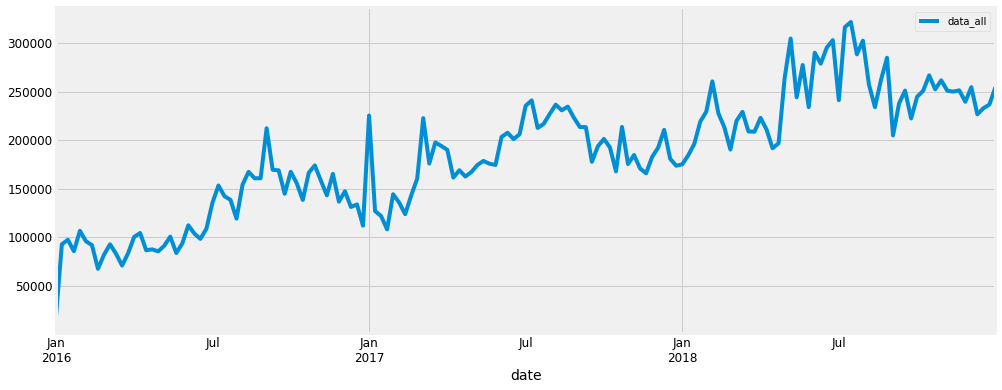

In [44]:
df4.plot(figsize=(15, 6))
plt.show()

In [45]:
y = df4['data_all'].resample('MS').sum()

In [46]:
y.shape

(36,)

In [47]:
y.head()

date
2016-01-01    291738.0
2016-02-01    443577.0
2016-03-01    329799.0
2016-04-01    378593.0
2016-05-01    454343.0
Freq: MS, Name: data_all, dtype: float64

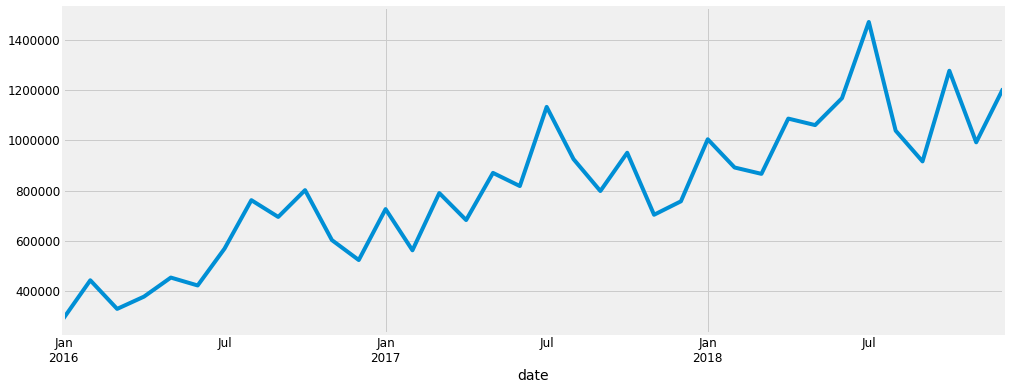

In [48]:
y.plot(figsize=(15, 6))
plt.show()

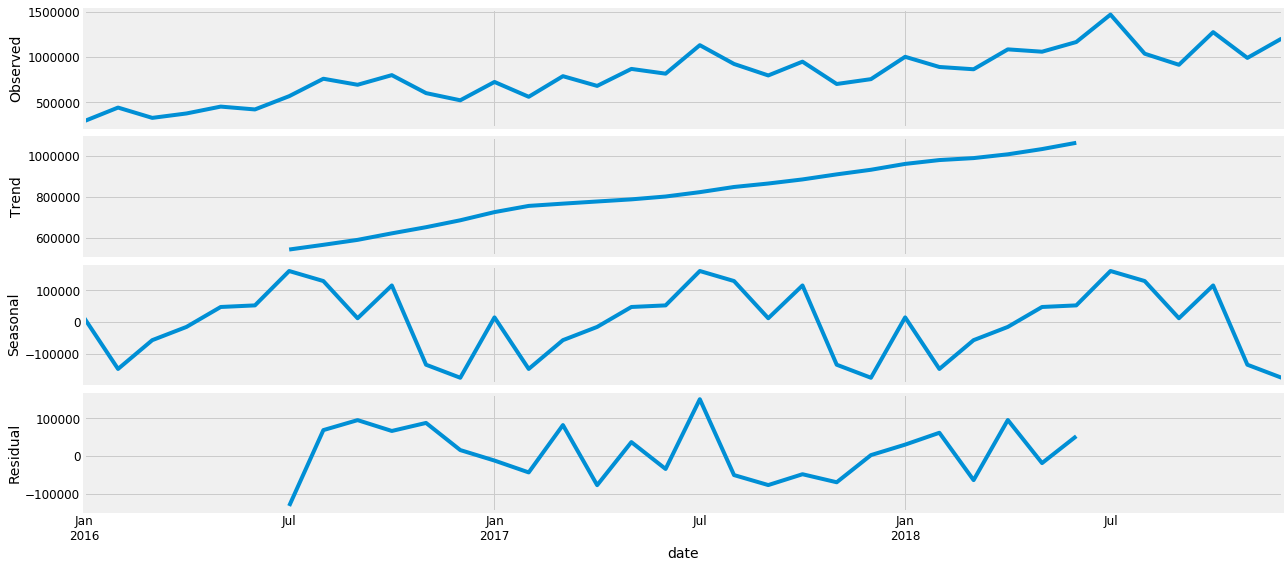

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [50]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [51]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1058.0035297195036
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:649.8059997216213
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:653.4123371383095
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:327.3712083620327
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1008.7030396998434
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:614.5039234057523
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:708.6346695914793
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:334.58687963256705
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:925.4002034103015
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:599.2110702032029
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:626.9524062430211
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:301.4661571475256
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:891.7274683458644
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:562.607599668507
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:617.7008979904558
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:295.972074914095
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:954.1592869555988
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:626.202815348791
ARIMA(1, 0

In [79]:
#ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:271.1069676601286
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6543      0.832     -0.786      0.432      -2.286       0.977
ma.L1         -0.3922      0.550     -0.712      0.476      -1.471       0.687
ar.S.L12       0.4914      0.652      0.753      0.451      -0.787       1.770
sigma2      2.378e+10    1.1e-11   2.16e+21      0.000    2.38e+10    2.38e+10


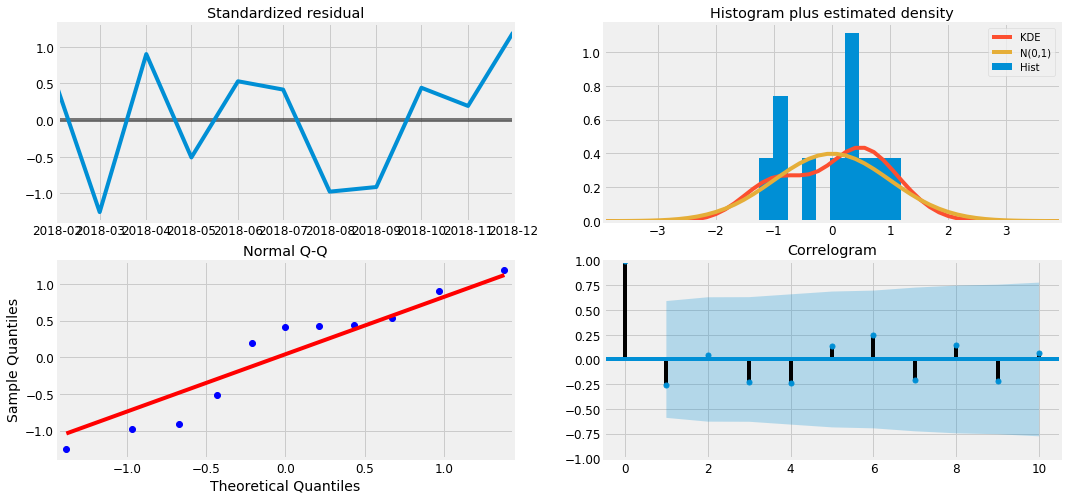

In [71]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

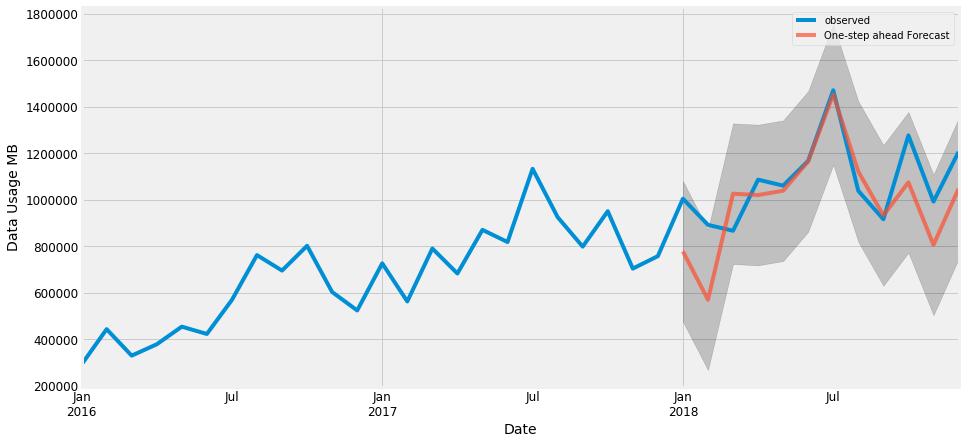

In [80]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Data Usage MB')
plt.legend()

plt.show()

In [81]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':'2018-12-01']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 24400159906.51


In [82]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 156205.51


In [83]:
y.head()

date
2016-01-01    291738.0
2016-02-01    443577.0
2016-03-01    329799.0
2016-04-01    378593.0
2016-05-01    454343.0
Freq: MS, Name: data_all, dtype: float64

In [84]:
y.tail()

date
2018-08-01    1038375.0
2018-09-01     916237.0
2018-10-01    1276623.0
2018-11-01     992073.0
2018-12-01    1205504.0
Freq: MS, Name: data_all, dtype: float64

In [85]:
y.shape

(36,)

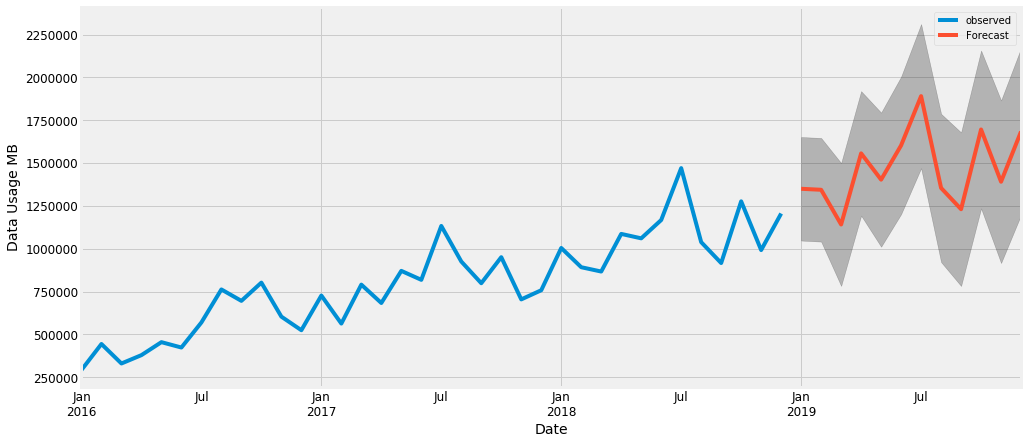

In [86]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(15, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Data Usage MB')

plt.legend()
plt.show()